## Carga de archivo, sustitución de valores nulos y atípicos

In [4]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

Dataframe=pd.read_csv("DataAnalytics.csv")
print(Dataframe.isnull().sum())

Dataframe["botón correcto"]=Dataframe["botón correcto"].fillna(100) ###
Dataframe["tiempo de interacción"]=Dataframe["tiempo de interacción"].fillna(100)
Dataframe["mini juego"]=Dataframe["mini juego"].fillna(100)
Dataframe["número de interacción"]=Dataframe["número de interacción"].fillna(100)
Dataframe["color presionado"]=Dataframe["color presionado"].fillna(100)



Dataframe["auto push"]=Dataframe["auto push"].fillna(100)
Dataframe["tiempo de lección"]=Dataframe["tiempo de lección"].fillna(100)
Dataframe["tiempo de sesión"]=Dataframe["tiempo de sesión"].fillna(100)

Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64


## Convertir las variables categóricas ordinales en variables numéricas respecto a su frecuencia

In [5]:
frecuencias = Dataframe['Administrador'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['Administrador_cat'] = Dataframe['Administrador'].map(mapeo_numeros)

Dataframe['Administrador_cat'] = Dataframe['Administrador_cat'].astype(int)

In [6]:
frecuencias = Dataframe['Usuario'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['Usuario_cat'] = Dataframe['Usuario'].map(mapeo_numeros)

Dataframe['Usuario_cat'] = Dataframe['Usuario_cat'].astype(int)

In [7]:
frecuencias = Dataframe['mini juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['minijuego_cat'] = Dataframe['mini juego'].map(mapeo_numeros)

Dataframe['minijuego_cat'] = Dataframe['minijuego_cat'].astype(int)

In [8]:
frecuencias = Dataframe['color presionado'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['color_cat'] = Dataframe['color presionado'].map(mapeo_numeros)

Dataframe['color_cat'] = Dataframe['color_cat'].astype(int)

In [9]:
frecuencias = Dataframe['dificultad'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['dificultad_cat'] = Dataframe['dificultad'].map(mapeo_numeros)

Dataframe['dificultad_cat'] = Dataframe['dificultad_cat'].astype(int)

In [10]:
frecuencias = Dataframe['Juego'].value_counts()

# 2. Crear un diccionario de mapeo: nombre -> número según frecuencia
mapeo_numeros = {nombre: i+1 for i, (nombre, count) in enumerate(frecuencias.items())}

# 3. Aplicar el reemplazo en la columna
Dataframe['Juego_cat'] = Dataframe['Juego'].map(mapeo_numeros)

Dataframe['Juego_cat'] = Dataframe['Juego_cat'].astype(int)

## 5 Analizar las correlaciones lineales simples (“Heatmap”) que tiene la columna “Objetivo” (Libre a su elección) con respecto a las demás variables numéricas, proponer un modelo No lineal que supere la mejor correlación lineal simple encontrada para esta variable. Argumentar los hallazgos obtenidos en este punto.

Vamos a seleccionar **"tiempo de sesión"** como variable objetivo. Esta variable representa cuánto tiempo un usuario permanece activo en el juego, lo cual es un indicador clave de engagement y que se está disfrutando del juego

In [11]:
#Seleccionamos solo variables numéricas para correlación
columnas_num = Dataframe.select_dtypes(include=[np.number]).columns.tolist()

#Calculamos la matriz de correlación
corr_matriz = Dataframe[columnas_num].corr()

#Filtrar con la variable objetivo
objetivo_corr = corr_matriz[['tiempo de sesión']].sort_values(by='tiempo de sesión', ascending=False)

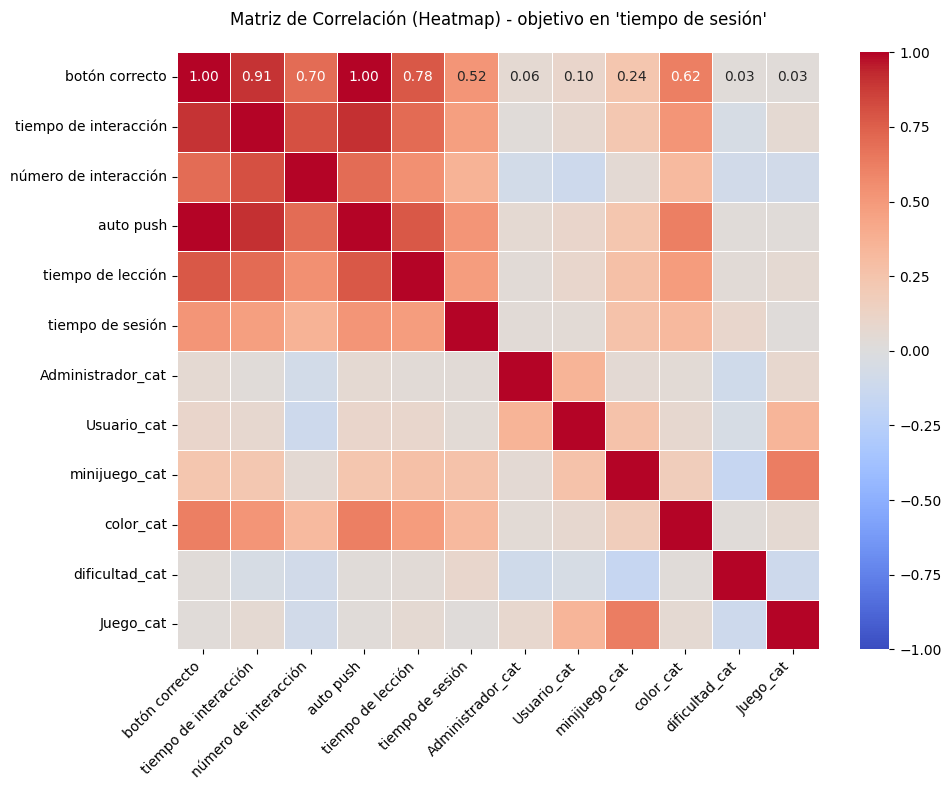


Correlación 'tiempo de sesión':
                       tiempo de sesión
tiempo de sesión               1.000000
auto push                      0.519140
botón correcto                 0.519092
tiempo de lección              0.482723
tiempo de interacción          0.470648
número de interacción          0.362476
color_cat                      0.323962
minijuego_cat                  0.259678
dificultad_cat                 0.089711
Usuario_cat                    0.044588
Administrador_cat              0.037569
Juego_cat                      0.021554


In [12]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matriz, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5)
plt.title("Matriz de Correlación (Heatmap) - objetivo en 'tiempo de sesión'", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Imprimimos la correlación de cada variable con la variable objetivo
print("\nCorrelación 'tiempo de sesión':")
print(objetivo_corr)

In [13]:
#Selección de variables (usando la segunda mejor correlación encontrada)
Vars_Indep = Dataframe[['botón correcto']]
Var_Dep = Dataframe['tiempo de sesión']

x = Vars_Indep.values
y = Var_Dep.values

In [14]:
#Función logarítmica
def modelo_log(x, a, b):
    return a * np.log(x + 1e-6) + b  # +1e-6 significa igual log(0)

#Función exponencial
def modelo_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

#Función cuadrática
def modelo_cuad(x, a, b, c):
    return a*x**2 + b*x + c

#Función polinomio inverso
def modelo_polinomio_inverso(x, a, b, c):
    return a/b * x**2 + c * x

#Función cociente polinomios
def modelo_cociente_polinomios(x,a,b,c):
    return (a*x**2 + b)/ c*x 


In [15]:
parametros, covs= curve_fit(modelo_cuad, Dataframe['botón correcto'], Dataframe['tiempo de sesión'])
a,b,c = parametros
parametros

array([ 1.66929395e-02, -1.66929395e-02,  8.94839758e-14])

In [16]:
y_pred = modelo_cuad(x, a, b,c)
y_pred

array([[-4.06130685e-12],
       [ 8.94839758e-14],
       [-4.06130685e-12],
       ...,
       [ 1.65260101e+02],
       [ 1.65260101e+02],
       [ 1.65260101e+02]])

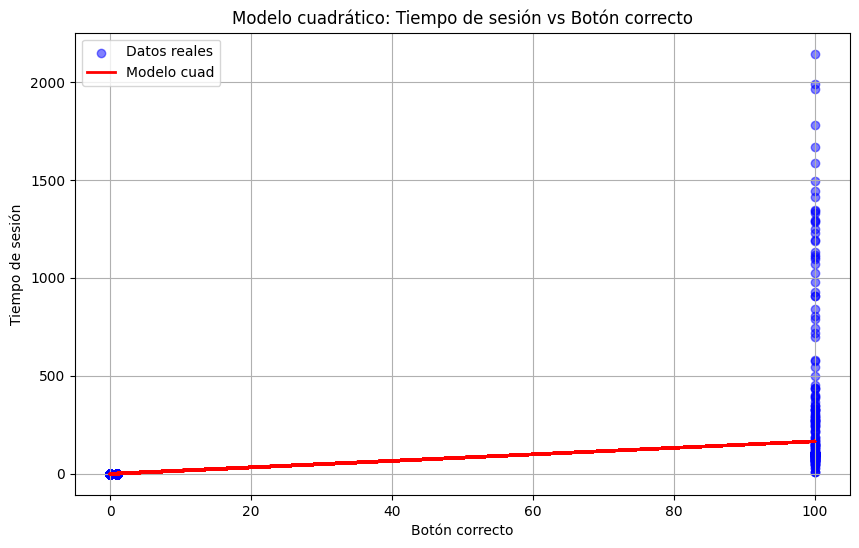

In [17]:
#Graficamos
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Datos reales')
plt.plot(np.sort(x), modelo_cuad(np.sort(x), a, b,c), 
         color='red', linewidth=2, label=f'Modelo cuad')
plt.title('Modelo cuadrático: Tiempo de sesión vs Botón correcto')
plt.xlabel('Botón correcto')
plt.ylabel('Tiempo de sesión')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo = r2_score(y, y_pred) 
R2_Modelo 

0.2695086410074564

In [19]:
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo)
R
# 0.5191422153906852 modelo cociente polinomios
# 0.17840017598095675 exp
# 0.5191422165528985 cuadratica 
# 0.5191422164758301 polinomio inverso


0.5191422165528984

## Modelo Seleccionado: Cuadrático (y = ax² + bx + c)

De las 4 funciones evaluadas, el modelo cuadrático obtuvo el mejor R² (0.5191), superando claramente al exponencial (0.1784) e igualando a modelos más complejos. Se elige por su mejor equilibrio entre poder predictivo y simplicidad, capturando eficientemente la relación no lineal observada entre botones correctos y tiempo de sesión. El modelo explica el 51.9% de la varianza, siendo la opción más efectiva con igual desempeño que alternativas más complejas.

## 6 Generar un dataframe por cada “usuario”, generar el heatmap de cada usuario y con las siguientes variables como objetivo: “tiempo de interacción”, “botón correcto” “color presionado” y “dificultad” , proponer un modelo de regresión No lIneal que supere las correlaciones obtenidas en el heatmap de cada usuario.

### JOSE IAN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

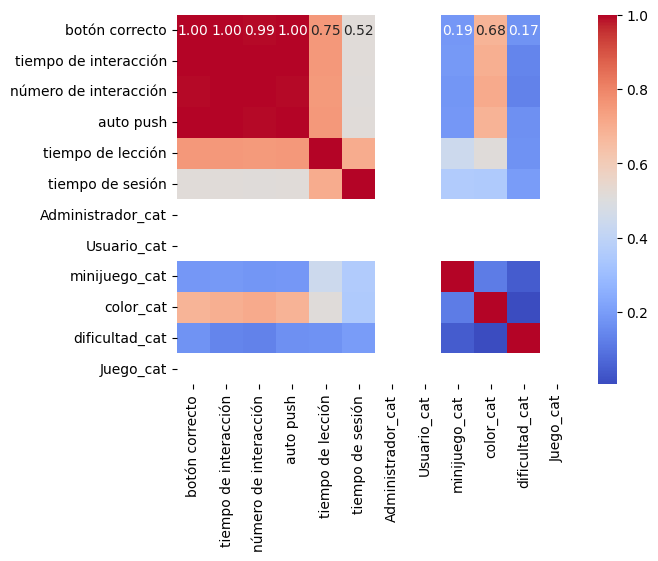

In [20]:
usuario1=Dataframe[Dataframe["Usuario"]=="JOSE IAN"]
usuario1=usuario1.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario1.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

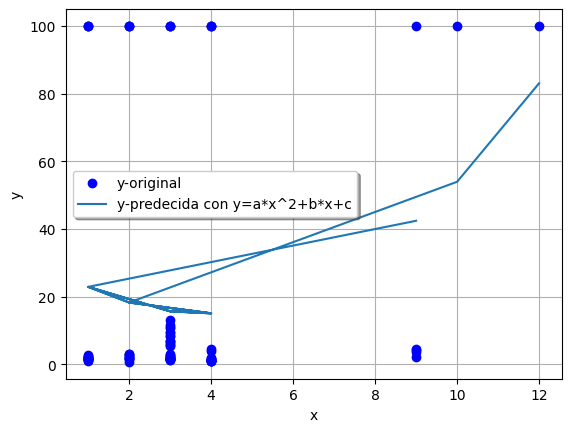

0.07587890820028564
0.27546126442802377


In [21]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario1[['minijuego_cat']]
Var_Dep= usuario1['tiempo de interacción']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c #("Función cuadrática")


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario1['minijuego_cat'], usuario1['tiempo de interacción'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

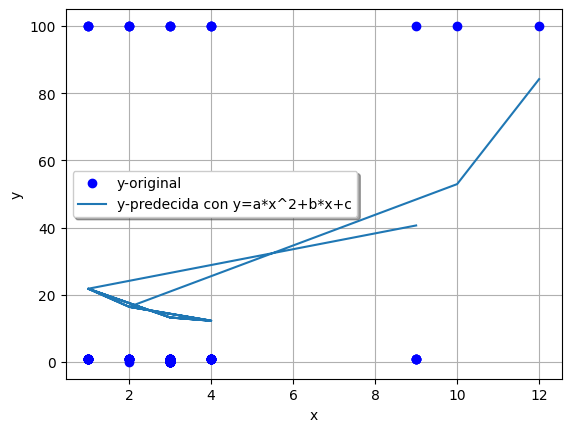

0.07971703556634424
0.2823420541937461


In [22]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario1[['minijuego_cat']]
Var_Dep= usuario1['botón correcto']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario1['minijuego_cat'], usuario1['botón correcto'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

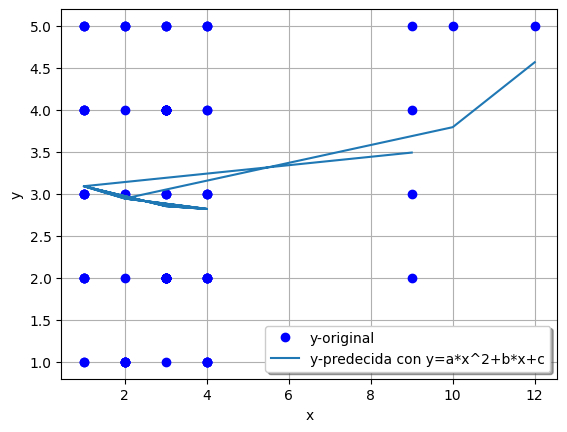

0.03531300474097865
0.18791754771968117


In [23]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario1[['minijuego_cat']]
Var_Dep= usuario1['color_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario1['minijuego_cat'], usuario1['color_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

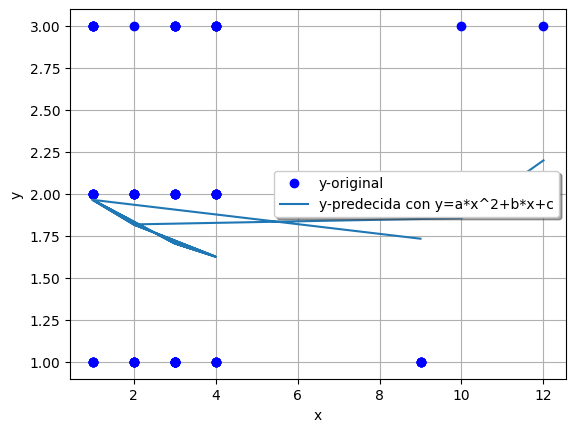

0.023620141603667433
0.15368845631233152


In [24]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario1[['minijuego_cat']]
Var_Dep= usuario1['dificultad_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario1['minijuego_cat'], usuario1['dificultad_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

### JOSE IGNACIO TADEO

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

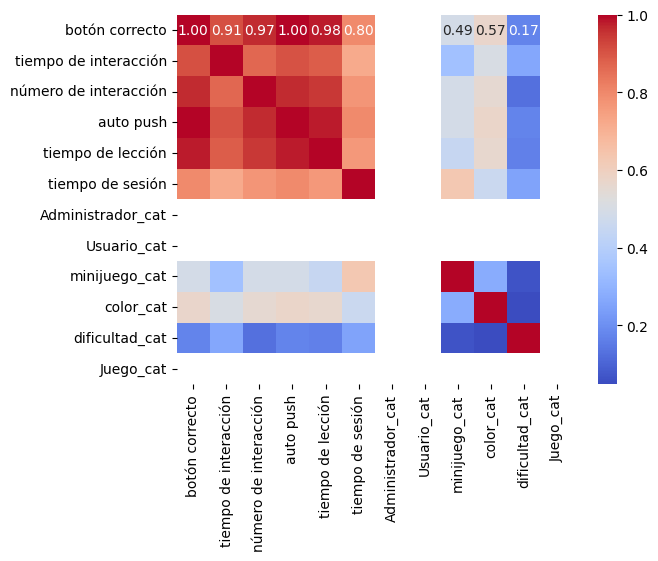

In [25]:
usuario2=Dataframe[Dataframe["Usuario"]=="JOSE IGNACIO TADEO"]
usuario2=usuario2.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario2.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

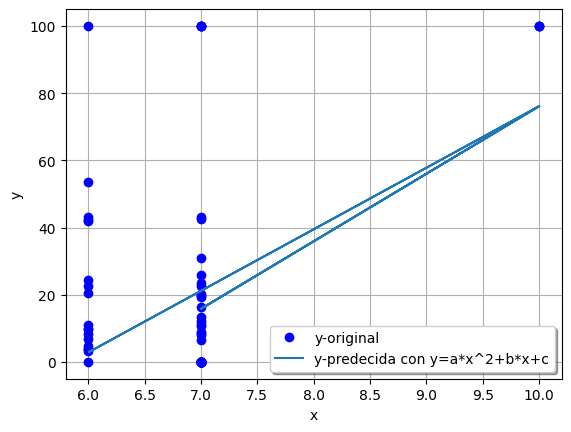

0.17369088688093304
0.4167623865956872


In [26]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario2[['minijuego_cat']]
Var_Dep= usuario2['tiempo de interacción']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2 + c*x #(Función polinomial inversa)


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario2['minijuego_cat'], usuario2['tiempo de interacción'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

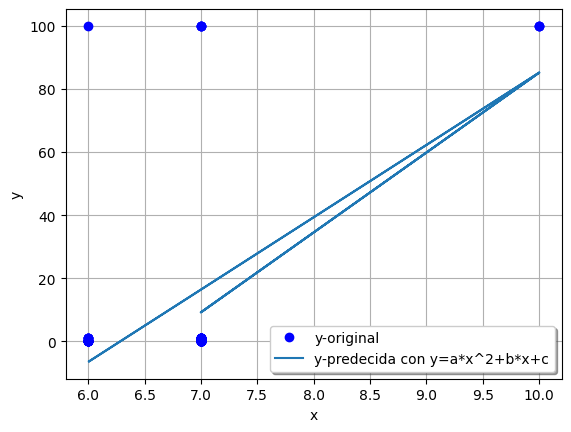

0.29543511506842146
0.5435394328550794


In [27]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario2[['minijuego_cat']]
Var_Dep= usuario2['botón correcto']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2 + c*x #(Función polinomial inversa)


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario2['minijuego_cat'], usuario2['botón correcto'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

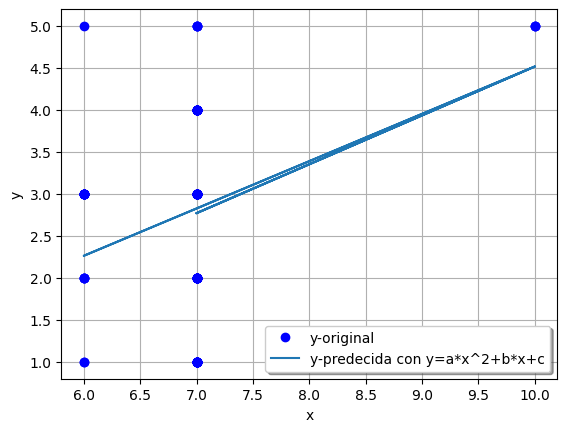

0.08321609782490758
0.28847200527071526


In [28]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario2[['minijuego_cat']]
Var_Dep= usuario2['color_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2 + c*x #(Función polinomial inversa)


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario2['minijuego_cat'], usuario2['color_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

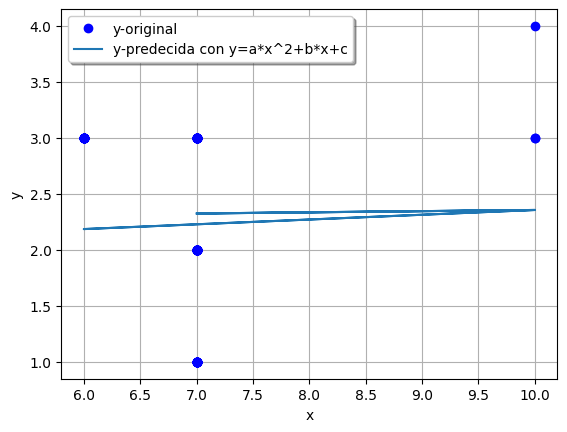

-0.06146152847323938
0.24791435713415103


In [29]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario2[['minijuego_cat']]
Var_Dep= usuario2['dificultad_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2 + c*x #(Función polinomial inversa)


#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario2['minijuego_cat'], usuario2['dificultad_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo1))
print(R)

### JOSE JAVIER

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

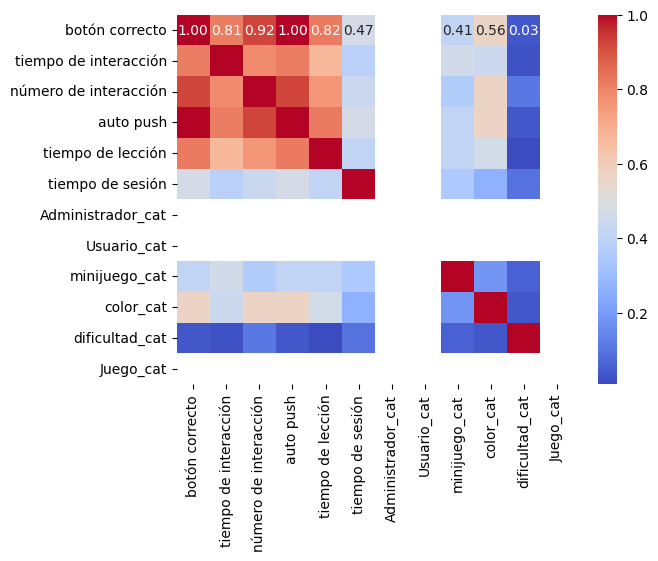

In [30]:
usuario3=Dataframe[Dataframe["Usuario"]=="JOSE JAVIER "]
usuario3=usuario3.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario3.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

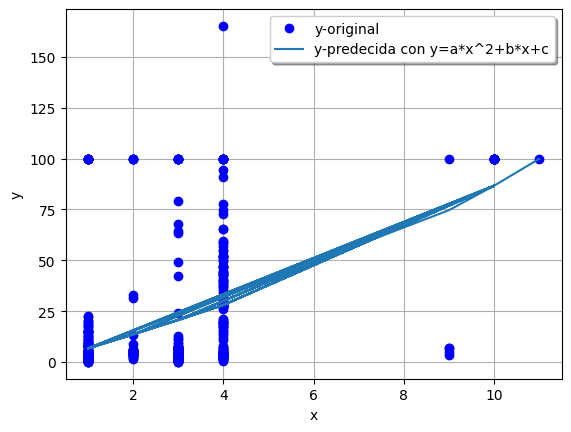

0.21967528711825657
0.46869530306826906


In [31]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario3[['minijuego_cat']]
Var_Dep= usuario3['tiempo de interacción']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario3['minijuego_cat'], usuario3['tiempo de interacción'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

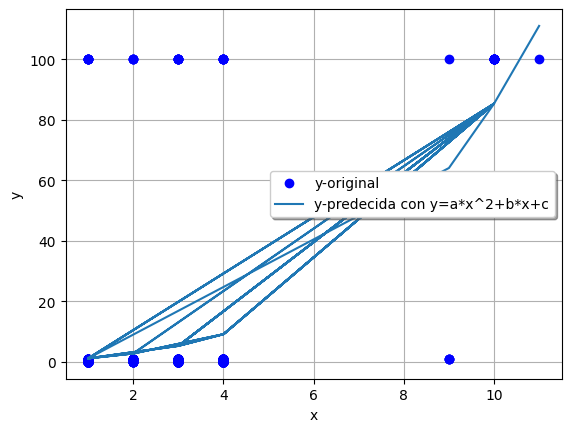

0.27494886840011945
0.524355669751095


In [32]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario3[['minijuego_cat']]
Var_Dep= usuario3['botón correcto']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario3['minijuego_cat'], usuario3['botón correcto'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

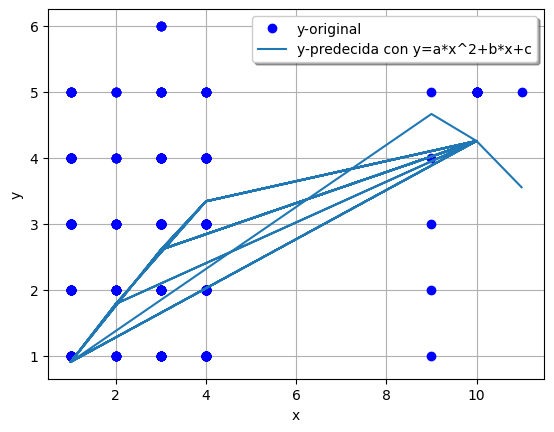

-0.7453488057227584
0.8633358591664998


In [33]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario3[['minijuego_cat']]
Var_Dep= usuario3['color_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario3['minijuego_cat'], usuario3['color_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo1))
print(R)

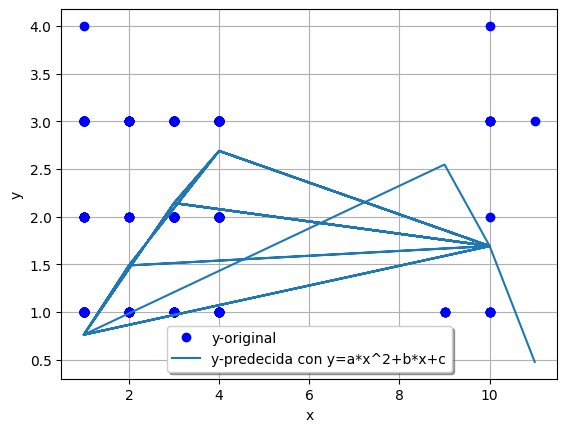

-0.6672441374672313
0.816850131583041


In [34]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario3[['minijuego_cat']]
Var_Dep= usuario3['dificultad_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario3['minijuego_cat'], usuario3['dificultad_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo1))
print(R)

### JOSHUA

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

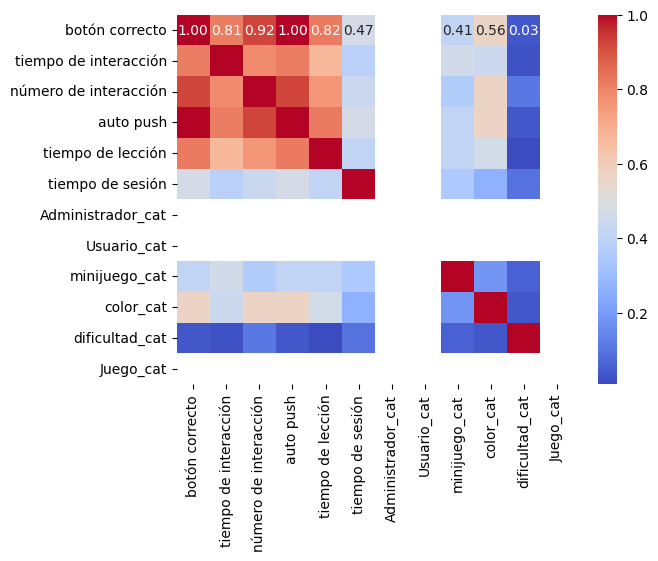

In [35]:
usuario4=Dataframe[Dataframe["Usuario"]=="JOSE JAVIER "]
usuario4=usuario4.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario4.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

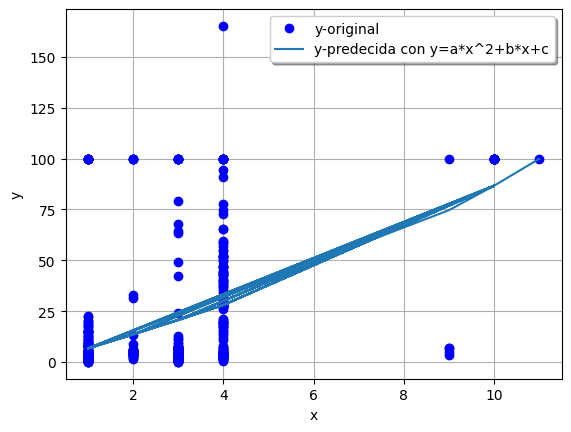

0.21967528711825657
0.46869530306826906


In [36]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario4[['minijuego_cat']]
Var_Dep= usuario4['tiempo de interacción']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario4['minijuego_cat'], usuario4['tiempo de interacción'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

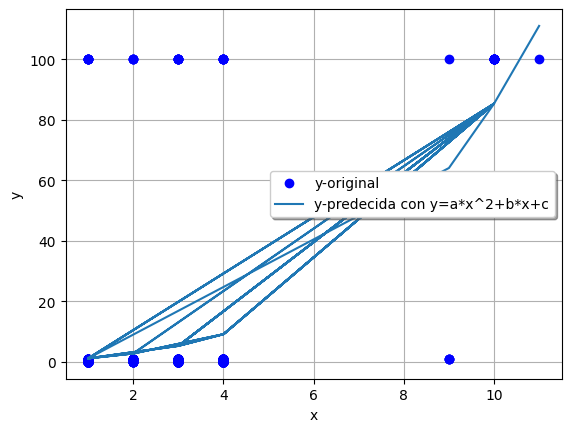

0.27494886840011945
0.524355669751095


In [37]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario4[['minijuego_cat']]
Var_Dep= usuario4['botón correcto']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario4['minijuego_cat'], usuario4['botón correcto'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

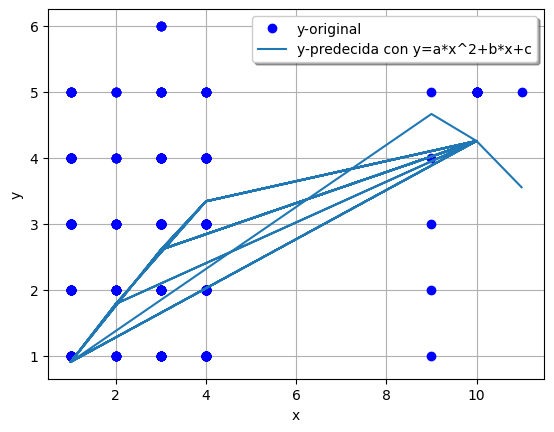

-0.7453488057227584
0.8633358591664998


In [38]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario4[['minijuego_cat']]
Var_Dep= usuario4['color_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario4['minijuego_cat'], usuario4['color_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo1))
print(R)

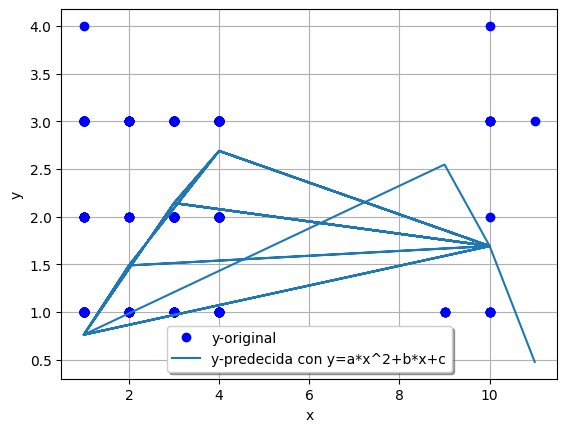

-0.6672441374672313
0.816850131583041


In [39]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario4[['minijuego_cat']]
Var_Dep= usuario4['dificultad_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**2 + b)/ c*x #(Función cociente entre polinomios)

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario4['minijuego_cat'], usuario4['dificultad_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(abs(R2_Modelo1))
print(R)

### KYTZIA

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

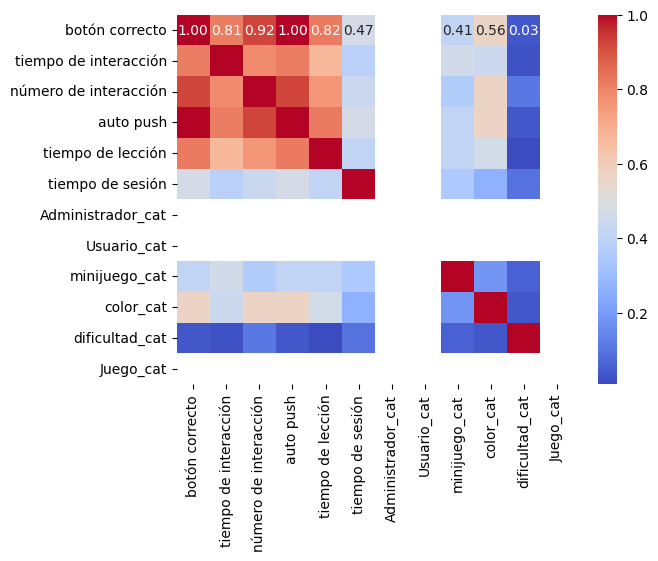

In [40]:
usuario5=Dataframe[Dataframe["Usuario"]=="JOSE JAVIER "]
usuario5=usuario5.select_dtypes(["int","float","int64","float64"])

Corr_factors=usuario5.corr()

#Obtener el valor absoluto
Corr_factors_abosluto=abs(Corr_factors)

#Ajustar el heatmap con los coeficientes de correlacion
Heat_map=sns.heatmap(Corr_factors_abosluto, cmap="coolwarm", annot=True, fmt=".2f")
Heat_map

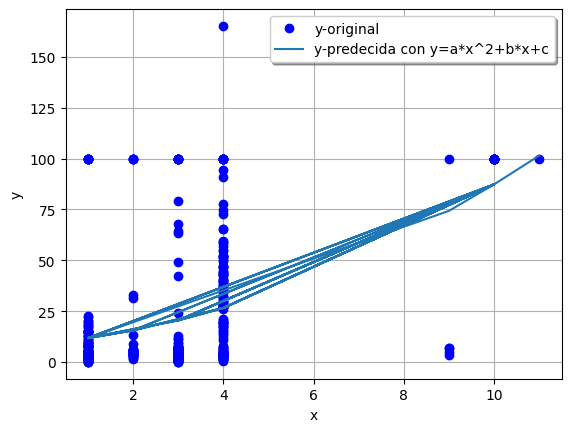

0.2277137320455549
0.4771936001724613


In [41]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario5[['minijuego_cat']]
Var_Dep= usuario5['tiempo de interacción']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c #("Función cuadrática")

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario5['minijuego_cat'], usuario5['tiempo de interacción'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

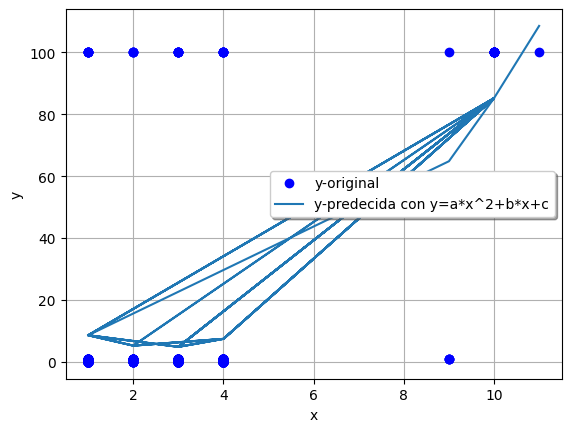

0.287728201715613
0.5364030217249088


In [42]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario5[['minijuego_cat']]
Var_Dep= usuario5['botón correcto']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c #("Función cuadrática")

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario5['minijuego_cat'], usuario5['botón correcto'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

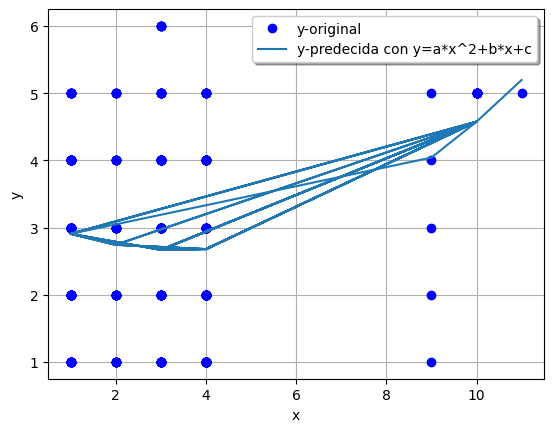

0.08953653048831156
0.2992265537820993


In [43]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario5[['minijuego_cat']]
Var_Dep= usuario5['color_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c #("Función cuadrática")

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario5['minijuego_cat'], usuario5['color_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)

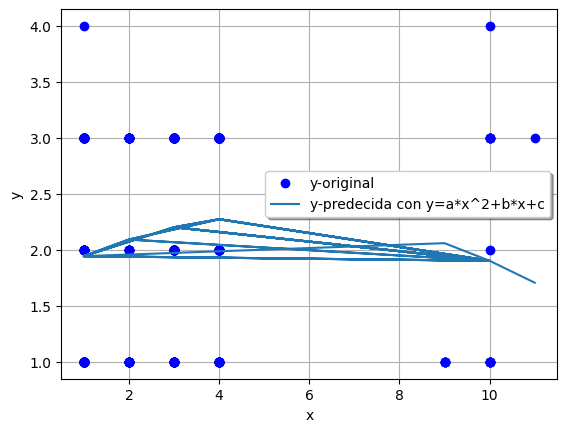

0.027920318833485336
0.16709374265209734


In [44]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= usuario5[['minijuego_cat']]
Var_Dep= usuario5['dificultad_cat']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c #("Función cuadrática")

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, usuario5['minijuego_cat'], usuario5['dificultad_cat'])

# Predicciones
y_pred1 = func1(x, *parametros1)


#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
print(R)